# Имитация подбора пароля с помощью генетического алгоритма

Предположим что длинна пароля 20 символов. Используется 500 символов ASCII, правая сторона пароля задается пробелом



In [242]:
import random
import numpy
import matplotlib.pyplot as plt

## Задаём пароль и проверяем корректность

In [459]:
l = 20 # длинна пароля

# password = input('Введите пароль: ')
password = 'asd45fyjae'

password = [x for x in password]
if len(password) <l:
    [password.append(' ') for x in range(l-len(password))]
    
print('Password: ', password)

Password:  ['a', 's', 'd', '4', '5', 'f', 'y', 'j', 'a', 'e', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [467]:
# list_of_values = [i for i in values]
list_of_values = [chr(i) for i in range(20, 512)]
list_of_values.append(' ')
# bot = print(random.sample(list_of_values,l))
print('Possible values of password: ', list_of_values)

for i in password:
    if i not in list_of_values:
        print('ERROR')

Possible values of password:  ['\x14', '\x15', '\x16', '\x17', '\x18', '\x19', '\x1a', '\x1b', '\x1c', '\x1d', '\x1e', '\x1f', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x80', '\x81', '\x82', '\x83', '\x84', '\x85', '\x86', '\x87', '\x88', '\x89', '\x8a', '\x8b', '\x8c', '\x8d', '\x8e', '\x8f', '\x90', '\x91', '\x92', '\x93', '\x94', '\x95', '\x96', '\x97', '\x98', '\x99', '\x9a', '\x9b', '\x9c', '\x9d', '\x9e', '\x9f', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹

## Giperparams

In [469]:
N = 100        # Общее число ботов
NSURV = 20     # Количество выживших (столько лучших переходит в новую популяцию)
nnew = N-NSURV # Количество новых (столько новых ботов создается)
EPOCHS = 2000   # количество эпох
MUT = 0.5      # коэфициент мутаций
FREQ_MUT_CHANGE = int(EPOCHS/5 )# чатота уменьшения мутации


eph_change_mut = [x for x in range(FREQ_MUT_CHANGE, EPOCHS, FREQ_MUT_CHANGE)] # эпохи смены коэфициента мутации
new_mut = [MUT/x for x in range(1, int(EPOCHS/FREQ_MUT_CHANGE))]         # новый коэфициент мутаци



## Fit and result

400 0.3333333333333333
800 0.2222222222222222
1200 0.14814814814814814
1600 0.09876543209876543
Выполненно на эпохе:  1914


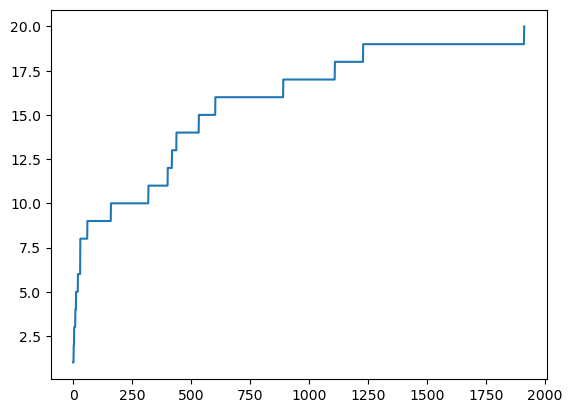

In [470]:
mut = MUT
# trains = train.shape[0] # Количество вагонов поезда
popul = np.ones([N, l], dtype=str)     # Двумерный массив популяции, размерностью [n, l].
result = np.zeros(N)
# result = np.zeros(N)
plot_values = [] # значения для графика по среднему значению
m = []
# plotminval = []  # значения для графика по минимальному значению

# Create first generation
for i in range(N):
#     print('Da')
    popul[i,] = random.sample(list_of_values, l)
    
# [popul[i] = random.sample(list_of_values, l) for i in range(N)]
next_popul = popul
for e in range(1, EPOCHS):
    
    if e%FREQ_MUT_CHANGE== 0:
        
        mut/=1.5
        print(e, mut)
    result = [int(sum(next_popul[i] == password)) for i in range(N)]    # получаем результаты 
    m.append(mut*100)
    plot_values.append(max(result))
    if max(result) == l:
        print('Выполненно на эпохе: ', e)
        
        break
    ind = np.argsort(result) # получаем лучшие индексы
    
    next_popul = next_popul[ind][-NSURV:] # популяция с лучшими результатами
    for i in range (N - NSURV): # add next population
        first_parent = next_popul[random.randint(0, NSURV - 1)]
        second_parent = next_popul[random.randint(0, NSURV - 1)]
        
        # добавляем скрещивание 
        new_bot = [first_parent[i] if random.random()>0.5 else second_parent[i] for i in range(l)]
        # добавляем мутацию
        new_bot = np.array([new_bot[i] if random.random()>mut else random.choice(list_of_values) for i in range(l)]).reshape((1,l))


        
        next_popul = np.concatenate((next_popul, new_bot), axis = 0)
    
    

plt.plot(plot_values)
# plt.plot(m)

Используя генетический алгоритм, найдите корни уравнения:

$f(xy)=7x^2 - y + \frac{y^3 - x^2}{3x} + y^2 - 21x$

*P.s. постарайтесь по максимуму использовать возможности библиотеки numpy для ускорения процеесса вычислений*